# A quick tour of IPython Notebook

In [1]:
import pandas as pd
import numpy as np

### Some short cuts 
* m - makes any cell markdown
* y - makes any cell code again
* a, b = add cell before , add cell after current cell
* x,v - cut,paste cell
* z - cundo last NB action
* ctrl + enter - execute this cell
* shift + enter == ctrl + enter + create new cell below if doesn't exist else move to one below
* alt + enter == ctrl + enter + create new cell below

### Magic functions

In [74]:
%quickref

In [76]:
%timeit sum([x for x in range(100000)])

6.84 ms ± 382 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [78]:
pwd

'C:\\Users\\putripat\\work\\Pandas Tutorial'

# Pandas Tutorial

### Pandas Series
* Series is a one-dimensional labeled array capable of holding any data type 
* Basic method to create a Series --> 
<pre> s = pd.Series(data, index=index)</pre>
* data can be many different things:
 - a Python dict
 - an ndarray
 - a scalar value (like 5)
 - even python objects

In [79]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.739997
b   -1.720626
c   -0.429736
d   -2.029808
e    0.768137
dtype: float64

#### You can do away with index, it will take number 0- 4 as default for index 

In [80]:
pd.Series(np.random.randn(5))

0   -0.129163
1   -1.407521
2    0.369548
3   -1.111910
4    1.768960
dtype: float64

#### From dictionary

In [82]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [83]:
pd.Series(d, index=['b', 'c', 'd', 'a'])
# NaN - Not a number, but you already know that

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [84]:
s

a   -0.739997
b   -1.720626
c   -0.429736
d   -2.029808
e    0.768137
dtype: float64

In [85]:
# Slicing of series looks perfectly like list's
print(s[0])
print('*'* 20)
print(s[1:3])
print('*'* 20)
print(s[s>2.5])

-0.739997070747
********************
b   -1.720626
c   -0.429736
dtype: float64
********************
Series([], dtype: float64)


#### You can access series like dicts too

In [86]:
print(s['c'])
print(s.get('f'))
# print(s['f'])

-0.429736329346
None


In [87]:
s['f']

KeyError: 'f'

### Operations of Series

In [88]:
s+s

a   -1.479994
b   -3.441252
c   -0.859473
d   -4.059617
e    1.536273
dtype: float64

In [89]:
s * 2

a   -1.479994
b   -3.441252
c   -0.859473
d   -4.059617
e    1.536273
dtype: float64

In [92]:
s[1:] + s

a         NaN
b   -3.441252
c   -0.859473
d   -4.059617
e    1.536273
dtype: float64

### DataFrame
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 

In [93]:
# From list of lists
d = [[1,2,3],[2,3,4,5],[4,5,6]]
pd.DataFrame(d)

,0,1,2,3
0,1,2,3,NaN
1,2,3,4,5.0
2,4,5,6,NaN


In [94]:
# from dict of lists
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [95]:
# From dict of dicts
pd.DataFrame({('a', 'b'): {('A', 'B'): 1,
                           ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3,
                           ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5,
                           ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7,
                           ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9,
                           ('A', 'B'): 10}
             })

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

#### Reading data from a csv file
I've taken a reasonably weird dataset, so that we can see various parameters of <b>pd.read_csv</b> these are the ones we will ue most.

In [2]:
#If you remove encoding=latin1,it will fail.
df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', index_col='Date')
df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
01/01/2012,35,NaN,0,38,51,26,10,16,NaN
02/01/2012,83,NaN,1,68,153,53,6,43,NaN
03/01/2012,135,NaN,2,104,248,89,3,58,NaN


In [98]:
df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


#### Selecting a column(s)

In [101]:
pd.read_csv?

In [102]:
df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

In [103]:
df[['Berri 1','Rachel1']]

,Berri 1,Rachel1
Date,,
2012-01-01,35,16
2012-01-02,83,43
2012-01-03,135,58
2012-01-04,144,61
2012-01-05,197,95
2012-01-06,146,75
2012-01-07,98,54
2012-01-08,95,63
2012-01-09,244,173


### Let's take another example

In [104]:
complaints = pd.read_csv('data/311-service-requests.csv')

C:\Users\putripat\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [105]:
complaints.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

In [106]:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Status', 'Due Date', 'Resolution Action Updated Date', 'Community Board', 'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location'], dtype='object')

In [107]:
complaints.count()

Unique Key                        111069
Created Date                      111069
Closed Date                        60270
Agency                            111069
Agency Name                       111069
Complaint Type                    111069
Descriptor                        110613
Location Type                      79022
Incident Zip                       98807
Incident Address                   84441
Street Name                        84432
Cross Street 1                     84728
Cross Street 2                     84005
Intersection Street 1              19364
Intersection Street 2              19366
Address Type                      102247
City                               98854
Landmark                              95
Facility Type                      19104
Status                            111069
Due Date                           39239
Resolution Action Updated Date     96507
Community Board                   111069
Borough                           111069
X Coordinate (St

In [108]:
complaints['City'].unique()

array(['JAMAICA', 'MASPETH', 'NEW YORK', 'JACKSON HEIGHTS',
       'SOUTH RICHMOND HILL', 'OZONE PARK', 'BROOKLYN', 'BRONX',
       'STATEN ISLAND', nan, 'MIDDLE VILLAGE', 'LONG ISLAND CITY',
       'Rego Park', 'WOODHAVEN', 'RICHMOND HILL', 'EAST ELMHURST',
       'SAINT ALBANS', 'SOUTH OZONE PARK', 'FRESH MEADOWS', 'Jamaica',
       'NEW HYDE PARK', 'ASTORIA', 'HOWARD BEACH', 'ELMHURST',
       'FAR ROCKAWAY', 'COLLEGE POINT', 'Elmhurst', 'FLUSHING',
       'REGO PARK', 'East Elmhurst', 'Hollis', 'Springfield Gardens',
       'Forest Hills', 'BAYSIDE', 'Ridgewood', 'SPRINGFIELD GARDENS',
       'WOODSIDE', 'South Ozone Park', 'RIDGEWOOD', 'OAKLAND GARDENS',
       'Maspeth', 'CORONA', 'ROCKAWAY PARK', 'Kew Gardens', 'Astoria',
       'Saint Albans', 'Sunnyside', 'Flushing', 'Oakland Gardens',
       'Jackson Heights', 'Ozone Park', 'Rosedale', 'Howard Beach',
       'Woodside', 'Far Rockaway', 'Woodhaven', 'Queens Village',
       'South Richmond Hill', 'Fresh Meadows', 'LITTLE NECK'

In [110]:
complaints['City'].value_counts()

BROOKLYN                  31662
NEW YORK                  22664
BRONX                     18438
STATEN ISLAND              4766
Jamaica                    1521
Flushing                   1066
Astoria                     892
FLUSHING                    737
JAMAICA                     725
ASTORIA                     676
Ridgewood                   651
Far Rockaway                511
Ozone Park                  445
Elmhurst                    423
RIDGEWOOD                   422
Corona                      377
Queens Village              362
Long Island City            346
Jackson Heights             341
LONG ISLAND CITY            332
CORONA                      330
South Richmond Hill         324
Woodside                    305
Springfield Gardens         304
WOODSIDE                    304
Forest Hills                296
Saint Albans                291
Woodhaven                   291
East Elmhurst               288
EAST ELMHURST               274
                          ...  
FLORENCE

In [111]:
%matplotlib inline

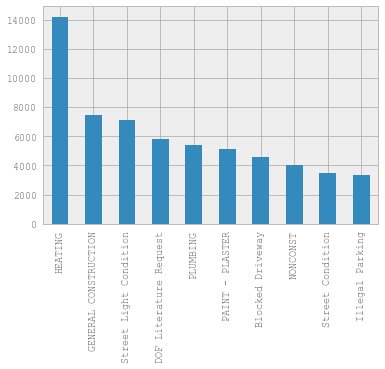

In [112]:
complaints['Complaint Type'].value_counts()[:10].plot(kind='bar')

In [113]:
import matplotlib.pyplot as plt 
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

C:\Users\putripat\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


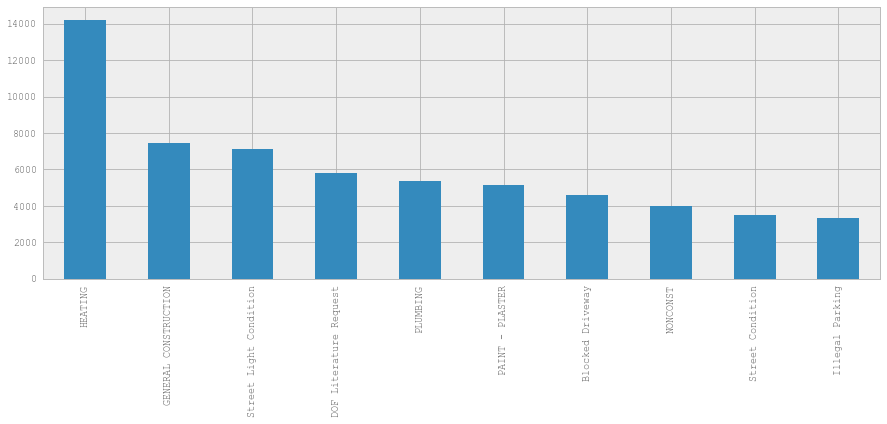

In [114]:
complaints['Complaint Type'].value_counts()[:10].plot(kind='bar')

#### Subsetting

In [ ]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints.head()

In [115]:
type(complaints['Complaint Type'] == "Noise - Street/Sidewalk")

pandas.core.series.Series

In [116]:
comp_count=complaints['Borough'].value_counts()

In [117]:
noise_complaints_count = noise_complaints['Borough'].value_counts()

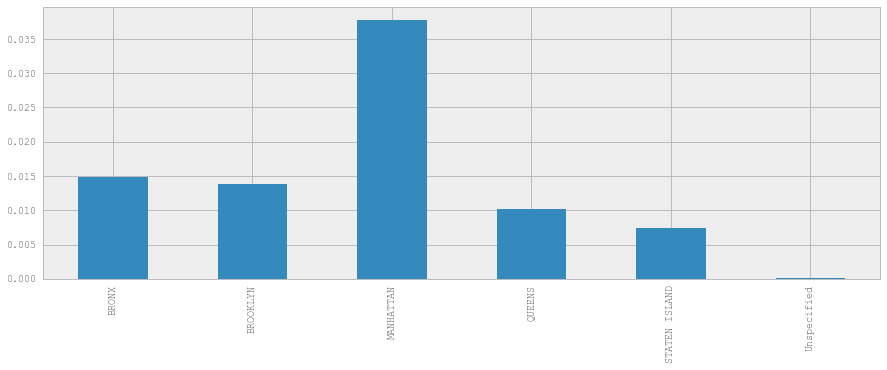

In [118]:
(noise_complaints_count / comp_count).plot(kind='bar')

#### Cleaning up data

In [119]:
complaints['Incident Zip'].unique()

array([11432.0, 11378.0, 10032.0, 10023.0, 10027.0, 11372.0, 11419.0,
       11417.0, 10011.0, 11225.0, 11218.0, 10003.0, 10029.0, 10466.0,
       11219.0, 10025.0, 10310.0, 11236.0, nan, 10033.0, 11216.0, 10016.0,
       10305.0, 10312.0, 10026.0, 10309.0, 10036.0, 11433.0, 11235.0,
       11213.0, 11379.0, 11101.0, 10014.0, 11231.0, 11234.0, 10457.0,
       10459.0, 10465.0, 11207.0, 10002.0, 10034.0, 11233.0, 10453.0,
       10456.0, 10469.0, 11374.0, 11221.0, 11421.0, 11215.0, 10007.0,
       10019.0, 11205.0, 11418.0, 11369.0, 11249.0, 10005.0, 10009.0,
       11211.0, 11412.0, 10458.0, 11229.0, 10065.0, 10030.0, 11222.0,
       10024.0, 10013.0, 11420.0, 11365.0, 10012.0, 11214.0, 11212.0,
       10022.0, 11232.0, 11040.0, 11226.0, 10281.0, 11102.0, 11208.0,
       10001.0, 10472.0, 11414.0, 11223.0, 10040.0, 11220.0, 11373.0,
       11203.0, 11691.0, 11356.0, 10017.0, 10452.0, 10280.0, 11217.0,
       10031.0, 11201.0, 11358.0, 10128.0, 11423.0, 10039.0, 10010.0,
       11209.0,

In [120]:
na_values = ['NO CLUE', '0']
complaints = pd.read_csv('data/311-service-requests.csv', na_values=na_values, dtype={'Incident Zip': str})

<b> Remember the error we got when we read complaints dataset before
<pre>C:\Users\putripat\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: 
Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)</pre>
In the statements(cell above) above we cleaned values and with <i>dtype</i> we provided it a datatype too.

You can use same function to provide dtypes to all cols in your dataframe</b>

In [121]:
complaints['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

In [122]:
complaints[complaints['Incident Zip'].str.len() > 5]['Incident Zip']

29136    77092-2016
30939    55164-0737
42600        000000
70539    11549-3650
85821    29616-0759
89304    35209-3114
Name: Incident Zip, dtype: object

#### Creating a new column

In [123]:
complaints['Incident Zip'] = complaints['Incident Zip'].str[0:5]

#### digress to list comprehensions

In [124]:
print([i if i%2 == 0 else 'k' for i in range(100) ])

[0, 'k', 2, 'k', 4, 'k', 6, 'k', 8, 'k', 10, 'k', 12, 'k', 14, 'k', 16, 'k', 18, 'k', 20, 'k', 22, 'k', 24, 'k', 26, 'k', 28, 'k', 30, 'k', 32, 'k', 34, 'k', 36, 'k', 38, 'k', 40, 'k', 42, 'k', 44, 'k', 46, 'k', 48, 'k', 50, 'k', 52, 'k', 54, 'k', 56, 'k', 58, 'k', 60, 'k', 62, 'k', 64, 'k', 66, 'k', 68, 'k', 70, 'k', 72, 'k', 74, 'k', 76, 'k', 78, 'k', 80, 'k', 82, 'k', 84, 'k', 86, 'k', 88, 'k', 90, 'k', 92, 'k', 94, 'k', 96, 'k', 98, 'k']


#### You can create conditional columns using list comprehensions

In [125]:
complaints['Complaint Type'].str.upper().unique()

array(['NOISE - STREET/SIDEWALK', 'ILLEGAL PARKING', 'NOISE - COMMERCIAL',
       'NOISE - VEHICLE', 'RODENT', 'BLOCKED DRIVEWAY',
       'NOISE - HOUSE OF WORSHIP', 'STREET LIGHT CONDITION',
       'HARBORING BEES/WASPS', 'TAXI COMPLAINT', 'HOMELESS ENCAMPMENT',
       'TRAFFIC SIGNAL CONDITION', 'FOOD ESTABLISHMENT', 'NOISE - PARK',
       'BROKEN MUNI METER', 'BENEFIT CARD REPLACEMENT',
       'SANITATION CONDITION', 'ELECTRIC', 'PLUMBING', 'HEATING',
       'GENERAL CONSTRUCTION', 'STREET CONDITION', 'CONSUMER COMPLAINT',
       'DERELICT VEHICLES', 'NOISE', 'DRINKING', 'INDOOR AIR QUALITY',
       'PANHANDLING', 'DERELICT VEHICLE', 'LEAD', 'WATER SYSTEM',
       'NOISE - HELICOPTER', 'HOMELESS PERSON ASSISTANCE',
       'ROOT/SEWER/SIDEWALK CONDITION', 'SIDEWALK CONDITION', 'GRAFFITI',
       'DOF LITERATURE REQUEST', 'ANIMAL IN A PARK',
       'OVERGROWN TREE/BRANCHES', 'AIR QUALITY', 'DIRTY CONDITIONS',
       'WATER QUALITY', 'OTHER ENFORCEMENT', 'COLLECTION TRUCK NOISE',
     

In [126]:
complaints['complain_class']=['NOISE' if 'NOISE' in i 
                              else 'WATER RELATED' if 'WATER' in i
                              else i 
                              for i in complaints['Complaint Type'].str.upper()]

In [127]:
complaints.head(50)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,complain_class
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)",NOISE
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)",ILLEGAL PARKING
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)",NOISE
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)",NOISE
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)",RODENT
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecif

#### Datatype conversion

In [128]:
complaints['Unique Key'].astype('str')

0         26589651
1         26593698
2         26594139
3         26595721
4         26590930
5         26592370
6         26595682
7         26595195
8         26590540
9         26594392
10        26595176
11        26591982
12        26594169
13        26594391
14        26590917
15        26591458
16        26594086
17        26595117
18        26590389
19        26594210
20        26592932
21        26594152
22        26589678
23        26592304
24        26591892
25        26591573
26        26590509
27        26591379
28        26594085
29        26589201
            ...   
111039    26428764
111040    26426166
111041    26438565
111042    26428990
111043    26432659
111044    26426096
111045    26437764
111046    26436286
111047    26428989
111048    26430030
111049    26429663
111050    26437763
111051    26432955
111052    26437035
111053    26433197
111054    26426060
111055    26430628
111056    26431648
111057    26437034
111058    26426094
111059    26429040
111060    26

<b> Dealing with timestamps </b>

In [132]:
complaints['Due Date'].head(3)

0    10/31/2013 10:08:41 AM
1    10/31/2013 10:01:04 AM
2    10/31/2013 10:00:24 AM
Name: Due Date, dtype: object

In [139]:
complaints['Due Date'].str[::-1].head()

0    MA 14:80:01 3102/13/01
1    MA 40:10:01 3102/13/01
2    MA 42:00:01 3102/13/01
3    MA 32:65:90 3102/13/01
4    MA 44:35:10 3102/03/11
Name: Due Date, dtype: object

In [141]:
complaints['Due Date'] = pd.to_datetime(complaints['Due Date'].str[:-3],format='%m/%d/%Y %H:%M:%S')

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [142]:
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,complain_class
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,2013-10-31 10:08:41,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)",NOISE
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,2013-10-31 10:01:04,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)",ILLEGAL PARKING
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,2013-10-31 10:00:24,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)",NOISE
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,2013-10-31 09:56:23,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)",NOISE
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,2013-11-30 01:53:44,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)",RODENT
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,2013-10-31 09:46:52,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Un

### Concatenation of dataframes

In [150]:
df1 = pd.DataFrame([[1,2,3],
                    [4,5,6]], columns=['a','b','c'])
df2 = pd.DataFrame([[1,24,3],
                    [4,5,60]], columns=['a','b','c'])
pd.concat([df1,df2],axis=1)

,a,b,c,a,b,c
0,1,2,3,1,24,3
1,4,5,6,4,5,60


In [151]:
df1.append(df2).reset_index().drop([0],axis=0)

#append can take single dataframe or a list of dataframes
#axis = 1 --> vertical axis
#axis = 0 --> horizontal axis (row)

,index,a,b,c
1,1,4,5,6
2,0,1,24,3
3,1,4,5,60


### Sorting Dataframe

In [152]:
complaints.sort_values('Complaint Type')

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,complain_class
46032,26534284,10/22/2013 12:00:00 AM,10/26/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,11203,5014 AVENUE D,AVENUE D,UTICA AVENUE,EAST 51 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,10/26/2013 12:00:00 AM,17 BROOKLYN,BROOKLYN,1003926.0,173234.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642142,-73.929101,"(40.6421420774005, -73.92910097234318)",APPLIANCE
26442,26559559,10/25/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,11229,1668 EAST 13 STREET,EAST 13 STREET,AVENUE P,KINGS HIGHWAY,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Open,NaT,10/25/2013 12:00:00 AM,15 BROOKLYN,BROOKLYN,995301.0,161092.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.608830,-73.960200,"(40.60882979942086, -73.96019952555454)",APPLIANCE
15268,26577154,10/28/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,11226,1207 ROGERS AVENUE,ROGERS AVENUE,AVENUE D,NEWKIRK AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Open,NaT,10/28/2013 12:00:00 AM,17 BROOKLYN,BROOKLYN,997750.0,172587.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640378,-73.951356,"(40.64037776846275, -73.95135639809963)",APPLIANCE
73249,26487117,10/15/2013 12:00:00 AM,10/17/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,10036,412 WEST 46 STREET,WEST 46 STREET,9 AVENUE,10 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaT,10/17/2013 12:00:00 AM,04 MANHATTAN,MANHATTAN,986633.0,216621.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.761251,-73.991398,"(40.76125074115243, -73.99139792167999)",APPLIANCE
93084,26463018,10/09/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,APPLIANCE,ELECTRIC/GAS-RANGE,RESIDENTIAL BUILDING,10463,1 MARBLE HILL AVENUE,MARBLE HILL AVENUE,WEST 225 STREET,MARBLE HILL LANE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Open,NaT,10/09/2013 12:00:00 AM,08 MANHATTAN,MANHATTAN,1008906.0,258026.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.874862,-73.910845,"(40.87486169319855, -73.91084545884848)",APPLIANCE
73212,26487116,10/15/2013 12:00:00 AM,10/17/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,10304,58 CEBRA AVENUE,CEBRA AVENUE,CHESTER PLACE,WARD AVENUE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,NaN,Closed,NaT,10/17/2013 12:00:00 AM,01 STATEN ISLAND,STATEN ISLAND,960767.0,170032.0,Unsp

In [153]:
complaints.sort_values(['Complaint Type','Descriptor'],ascending=[True,False])

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,complain_class
3335,26595286,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,10032,611 WEST 163 STREET,WEST 163 STREET,BROADWAY,FT WASHINGTON AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Open,NaT,10/30/2013 12:00:00 AM,12 MANHATTAN,MANHATTAN,1000085.0,244617.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.838078,-73.942773,"(40.83807823925359, -73.94277330261833)",APPLIANCE
3451,26591136,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,11238,643 FRANKLIN AVENUE,FRANKLIN AVENUE,BERGEN STREET,ST MARKS AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Open,NaT,10/30/2013 12:00:00 AM,08 BROOKLYN,BROOKLYN,996490.0,185724.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676438,-73.955873,"(40.67643777236141, -73.95587262133378)",APPLIANCE
3466,26590529,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,11372,35-36 76 STREET,76 STREET,35 AVENUE,37 AVENUE,NaN,NaN,ADDRESS,Jackson Heights,NaN,NaN,Open,NaT,10/30/2013 12:00:00 AM,03 QUEENS,QUEENS,1014669.0,212849.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.750846,-73.890212,"(40.75084556124554, -73.89021157476807)",APPLIANCE
3595,26591512,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,11372,35-36 76 STREET,76 STREET,35 AVENUE,37 AVENUE,NaN,NaN,ADDRESS,Jackson Heights,NaN,NaN,Open,NaT,10/30/2013 12:00:00 AM,03 QUEENS,QUEENS,1014669.0,212849.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.750846,-73.890212,"(40.75084556124554, -73.89021157476807)",APPLIANCE
3693,26591536,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,11432,170-10 CEDARCROFT ROAD,CEDARCROFT ROAD,HOMELAWN STREET,KINGSTON PLACE,NaN,NaN,ADDRESS,Jamaica,NaN,NaN,Open,NaT,10/30/2013 12:00:00 AM,08 QUEENS,QUEENS,1041790.0,198653.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.711746,-73.792448,"(40.71174624072556, -73.79244798830663)",APPLIANCE
3750,26591507,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,11372,37-40 81 STREET,81 STREET,37 AVENUE,ROOSEVELT AVENUE,NaN,NaN,ADDRESS,Jackson Heights,NaN,NaN,Open,NaT,10/30/2013 12:00:00 AM,03 QUEENS,QUEENS,1016062.0,212290.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unsp

In [ ]:
complaints.sort_index(level=3)

In [154]:
complaints.sort_index(axis=1)

,Address Type,Agency,Agency Name,Borough,Bridge Highway Direction,Bridge Highway Name,Bridge Highway Segment,City,Closed Date,Community Board,Complaint Type,Created Date,Cross Street 1,Cross Street 2,Descriptor,Due Date,Facility Type,Ferry Direction,Ferry Terminal Name,Garage Lot Name,Incident Address,Incident Zip,Intersection Street 1,Intersection Street 2,Landmark,Latitude,Location,Location Type,Longitude,Park Borough,Park Facility Name,Resolution Action Updated Date,Road Ramp,School Address,School City,School Code,School Name,School Not Found,School Number,School Phone Number,School Region,School State,School Zip,School or Citywide Complaint,Status,Street Name,Taxi Company Borough,Taxi Pick Up Location,Unique Key,Vehicle Type,X Coordinate (State Plane),Y Coordinate (State Plane),complain_class
0,ADDRESS,NYPD,New York City Police Department,QUEENS,NaN,NaN,NaN,JAMAICA,NaN,12 QUEENS,Noise - Street/Sidewalk,10/31/2013 02:08:41 AM,90 AVENUE,91 AVENUE,Loud Talking,2013-10-31 10:08:41,Precinct,NaN,NaN,NaN,90-03 169 STREET,11432,NaN,NaN,NaN,40.708275,"(40.70827532593202, -73.79160395779721)",Street/Sidewalk,-73.791604,QUEENS,Unspecified,10/31/2013 02:35:17 AM,NaN,Unspecified,Unspecified,Unspecified,Unspecified,N,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,Assigned,169 STREET,NaN,NaN,26589651,NaN,1042027.0,197389.0,NOISE
1,BLOCKFACE,NYPD,New York City Police Department,QUEENS,NaN,NaN,NaN,MASPETH,NaN,05 QUEENS,Illegal Parking,10/31/2013 02:01:04 AM,58 PLACE,59 STREET,Commercial Overnight Parking,2013-10-31 10:01:04,Precinct,NaN,NaN,NaN,58 AVENUE,11378,NaN,NaN,NaN,40.721041,"(40.721040535628305, -73.90945306791765)",Street/Sidewalk,-73.909453,QUEENS,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,N,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,Open,58 AVENUE,NaN,NaN,26593698,NaN,1009349.0,201984.0,ILLEGAL PARKING
2,ADDRESS,NYPD,New York City Police Department,MANHATTAN,NaN,NaN,NaN,NEW YORK,10/31/2013 02:40:32 AM,12 MANHATTAN,Noise - Commercial,10/31/2013 02:00:24 AM,WEST 171 STREET,WEST 172 STREET,Loud Music/Party,2013-10-31 10:00:24,Precinct,NaN,NaN,NaN,4060 BROADWAY,10032,NaN,NaN,NaN,40.843330,"(40.84332975466513, -73.93914371913482)",Club/Bar/Restaurant,-73.939144,MANHATTAN,Unspecified,10/31/2013 02:39:42 AM,NaN,Unspecified,Unspecified,Unspecified,Unspecified,N,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,Closed,BROADWAY,NaN,NaN,26594139,NaN,1001088.0,246531.0,NOISE
3,BLOCKFACE,NYPD,New York City Police Department,MANHATTAN,NaN,NaN,NaN,NEW YORK,10/31/2013 02:21:48 AM,07 MANHATTAN,Noise - Vehicle,10/31/2013 01:56:23 AM,COLUMBUS AVENUE,AMSTERDAM AVENUE,Car/Truck Horn,2013-10-31 09:56:23,Precinct,NaN,NaN,NaN,WEST 72 STREET,10023,NaN,NaN,NaN,40.778009,"(40.7780087446372, -73.98021349023975)",Street/Sidewalk,-73.980213,MANHATTAN,Unspecified,10/31/2013 02:21:10 AM,NaN,Unspecified,Unspecified,Unspecified,Unspecified,N,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,Closed,WEST 72 STREET,NaN,NaN,26595721,NaN,989730.0,222727.0,NOISE
4,BLOCKFACE,DOHMH,Department of Health and Mental Hygiene,MANHATTAN,NaN,NaN,NaN,NEW YORK,NaN,10 MANHATTAN,Rodent,10/31/2013 01:53:44 AM,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,Condition Attracting Rodents,2013-11-30 01:53:44,NaN,NaN,NaN,NaN,WEST 124 STREET,10027,NaN,NaN,NaN,40.807691,"(40.80769092704951, -73.94738703491433)",Vacant Lot,-73.947387,MANHATTAN,Unspecified,10/31/2013 01:59:54 AM,NaN,Unspecified,Unspecified,Unspecified,Unspecified,N,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,Pending,WEST 124 STREET,NaN,NaN,26590930,NaN,998815.0,233545.0,RODENT
5,BLOCKFACE,NYPD,New York City Police Department,QUEENS,NaN,NaN,NaN,JACKSON HEIGHTS,NaN,03 QUEENS,Noise - Commercial,10/31/2013 01:46:52 AM,84 STREET,85 STREET,Banging/Pounding,2013-10-31 09:46:52,Precinct,NaN,NaN,NaN,37 AVENUE,11372,NaN,NaN,NaN,40.749989,"(40.7499893014072, -73.88198770727831)",Club/Bar/Restaurant,-73.881988,QUEENS,Unspecified

### Joining dataframes in python

pd.merge(left, right, how='inner', on=None, suffixes=('_x', '_y'))

In [156]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [157]:
left

,A,B,key1,key2
0,A0,B0,K0,K0
1,A1,B1,K0,K1
2,A2,B2,K1,K0
3,A3,B3,K2,K1


In [158]:
right

,C,D,key1,key2
0,C0,D0,K0,K0
1,C1,D1,K1,K0
2,C2,D2,K1,K0
3,C3,D3,K2,K0


In [159]:
result = pd.merge(left, right, on=['key1', 'key2']) # how='left',
result

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


### Group by

In [ ]:
df.head()

In [160]:
df.groupby('Berri 1').agg({'Maisonneuve 1':'sum',
                           'Maisonneuve 2':'mean'})

,Maisonneuve 1,Maisonneuve 2
Berri 1,,
32,54,56.0
35,38,51.0
53,47,70.0
54,33,60.0
62,48,52.0
71,104,92.5
72,46,133.0
75,41,105.0
78,112,69.0


In [163]:
for i,v in enumerate(df.groupby('Berri 1')):
    print(i,v)

0 (32,             Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  St-Urbain (données non disponibles)
Date                                                                                                                                                                            
2012-01-14       32                                NaN                      0             54             56       19             0        1                                  NaN)
1 (35,             Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  St-Urbain (données non disponibles)
Date                                                                                                                                                                            
2012-01-01       35                                NaN                      0             38        

36 (197,             Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  St-Urbain (données non disponibles)
Date                                                                                                                                                                            
2012-01-05      197                                NaN                      2            124            330       97            13       95                                  NaN)
37 (210,             Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  St-Urbain (données non disponibles)
Date                                                                                                                                                                            
2012-01-23      210                                NaN                      6            114    

58 (348,             Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  St-Urbain (données non disponibles)
Date                                                                                                                                                                            
2012-03-08      348                                NaN                      6            238            530      270             9        9                                  NaN)
59 (371,             Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  St-Urbain (données non disponibles)
Date                                                                                                                                                                            
2012-03-09      371                                NaN                      8            279    

In [164]:
df.groupby(['Berri 1','Côte-Sainte-Catherine']).agg({'Maisonneuve 1':'sum',
                           'Maisonneuve 2':'mean'})

,,Maisonneuve 1,Maisonneuve 2
Berri 1,Côte-Sainte-Catherine,,
32,0,54,56.0
35,0,38,51.0
53,0,47,70.0
54,0,33,60.0
62,0,48,52.0
71,0,104,92.5
72,0,46,133.0
75,0,41,105.0
78,0,112,69.0


## Reading data from SQL databases
#### I am using sqlite because it gets shipped with Python core
I have connected with MySQL, Oracle and postgres in past with pandas, not very sure about how it works with Sybase though.
You can alternatively use SQLAlchemy for creating connection with DBs instead of the native ones like sqlite3 or MySQLdb(for mysql ofcourse).

In [166]:
import sqlite3

In [168]:
con = sqlite3.connect("data/weather_2012.sqlite")
df = pd.read_sql("SELECT * from weather_2012 LIMIT 30", con)
df

,id,date_time,temp
0,1,2012-01-01 00:00:00,-1.8
1,2,2012-01-01 01:00:00,-1.8
2,3,2012-01-01 02:00:00,-1.8
3,4,2012-01-01 03:00:00,-1.5
4,5,2012-01-01 04:00:00,-1.5
5,6,2012-01-01 05:00:00,-1.4
6,7,2012-01-01 06:00:00,-1.5
7,8,2012-01-01 07:00:00,-1.4
8,9,2012-01-01 08:00:00,-1.4
9,10,2012-01-01 09:00:00,-1.3


In [169]:
df.query("temp < -1.0")

,id,date_time,temp
0,1,2012-01-01 00:00:00,-1.8
1,2,2012-01-01 01:00:00,-1.8
2,3,2012-01-01 02:00:00,-1.8
3,4,2012-01-01 03:00:00,-1.5
4,5,2012-01-01 04:00:00,-1.5
5,6,2012-01-01 05:00:00,-1.4
6,7,2012-01-01 06:00:00,-1.5
7,8,2012-01-01 07:00:00,-1.4
8,9,2012-01-01 08:00:00,-1.4
9,10,2012-01-01 09:00:00,-1.3


In [170]:
weather_df = pd.read_csv('data/weather_2012.csv')
con = sqlite3.connect("data/test_db.sqlite")
con.execute("DROP TABLE IF EXISTS weather_2012")
weather_df.to_sql("weather_2012", con)

C:\Users\putripat\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:1362: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


### Plotting with Pandas

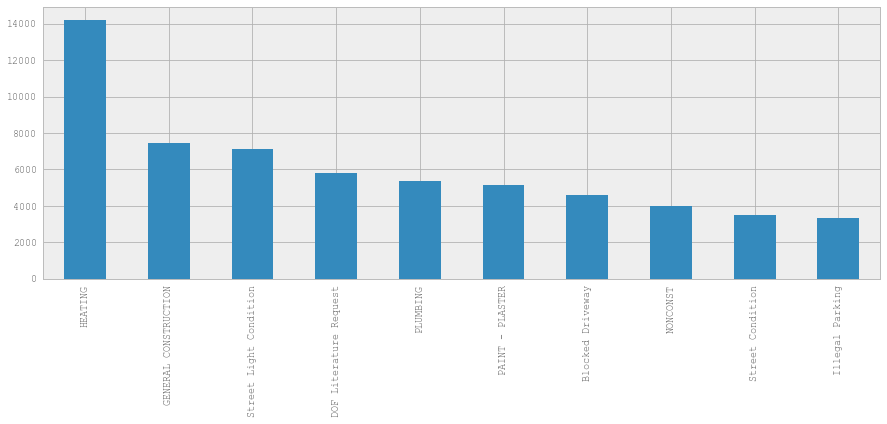

In [171]:
# We have seen this before
complaints['Complaint Type'].value_counts()[:10].plot(kind='bar')

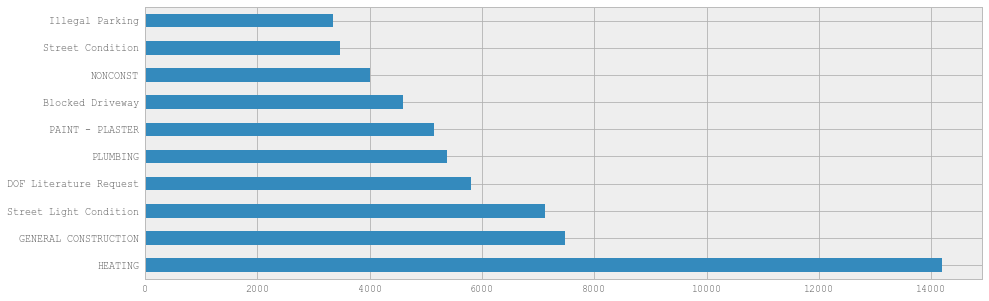

In [173]:
complaints['Complaint Type'].value_counts()[:10].plot(kind='barh')

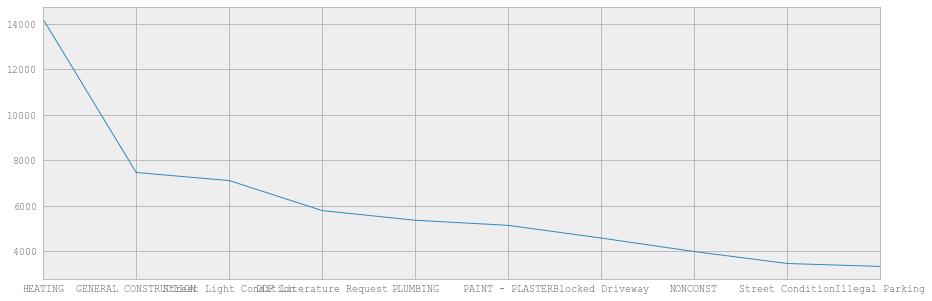

In [174]:
complaints['Complaint Type'].value_counts()[:10].plot(kind='line')

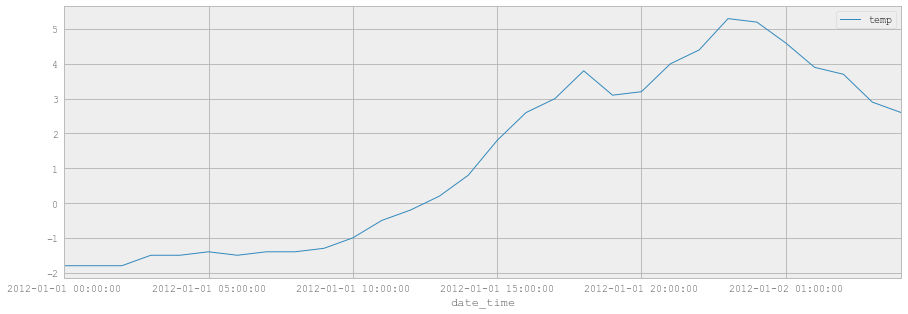

In [175]:
df.plot(kind='line', x='date_time',y='temp')

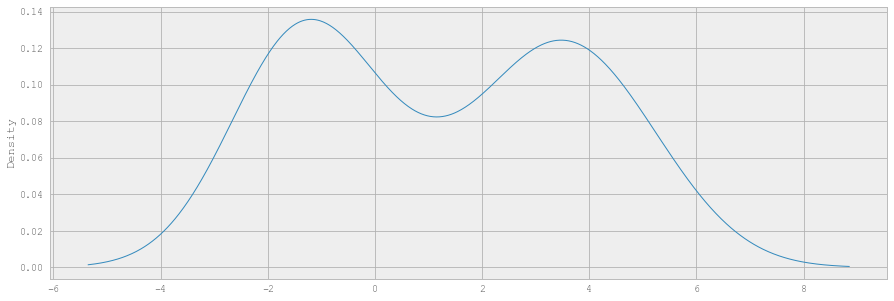

In [176]:
df['temp'].plot(kind='density')

<b>kind : str</b>
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot